# Short Rate Dynamics
The short rate under the Vasicek model has the following dynamics:
$$ d r_{t}= \kappa \left( \theta-r_{t} \right) dt + \sigma d w_{t}$$
Rearranging the equation, multiplying both sides by the integrating factor, and integrating from s to T, we get:
$$ d r_{t} =\kappa \theta dt -\kappa r_{t} dt + \sigma d w_{t} $$ $$ d r_{t}+ \kappa r_{t} dt = \kappa \theta dt + \sigma d w_{t}
$$

$$ e^{\kappa t} d r_{t} + \kappa e^{\kappa t} r_{t} dt =e^{\kappa t}\kappa\theta dt + e^{\kappa t} \sigma d w_{t}
$$

$$ d \left( e^{\kappa t} r_{t} \right) = e^{\kappa t}\kappa\theta dt + e^{\kappa t} \sigma d w_{t} $$ $$ \int_{s}^{t} {d \left( e^{k u} r_{u} \right)} = \kappa \theta \int_{s}^{t}{e^{\kappa u} du} +\sigma\int_{s}^{t} {e^{k u} d w_{u}}
$$

$$ e^{\kappa t} r_{t} -e^{\kappa s} r_{s} = \kappa \theta \frac{\left( e^{\kappa t}-e^{\kappa s}\right)}{\kappa} + \sigma\int_{s}^{t} {e^{k u} d w_{u}}
$$

$$ r_{t} = r_{s}e^{-\kappa \left( t-s\right)}+ \theta \left( 1-e^{-\kappa \left( t-s \right) }\right) +\sigma\int_{s}^{t} {e^{-k \left( t- u \right) } d w_{u}} $$
Which is Gaussian with mean and variance given by,

$$ E \left[ r_{t} \mid r_{s} \right]= r_{s}e^{-\kappa \left( t-s\right)}+ \theta \left( 1-e^{-\kappa \left( t-s \right) }\right)
$$

$$ V \left[ r_{t} \mid r_{s} \right]= V \left[ \sigma \int_{s}^{t} {e^{-\kappa \left(t-u \right)} d w_{u}} \right] = {\sigma}^{2} \int_{s}^{t} {e^{-2 \kappa \left(t-u \right)} du}=\frac{{\sigma}^2}{2{\kappa}} {\left( 1- e^{-2 \kappa \left( t -s \right)} \right)} $$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def vasicek(r0, a, b, sigma, T=1., N=10, seed=777):
    np.random.seed(seed)
    dt = T/float(N)
    rates = [r0]
    for i in range(N):
        dr = a*(b-rates[-1])*dt + \
            sigma*math.sqrt(dt)*np.random.normal()
        rates.append(rates[-1]+dr)

    return range(N+1), rates


Text(0.5, 0, 'Vasicek model')

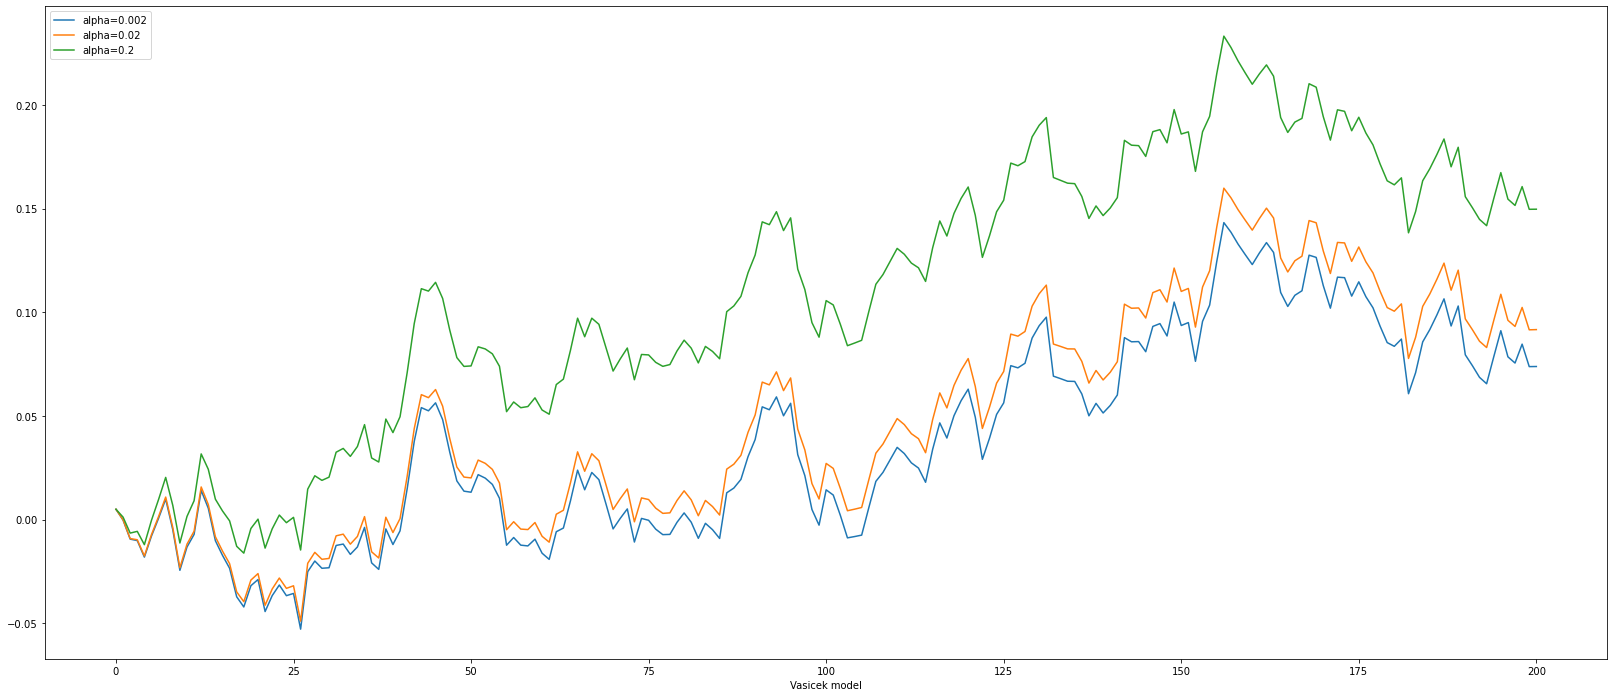

In [13]:
fig = plt.figure(figsize=(28,12))

for a in [0.002, 0.02, 0.2]:
    x, y = vasicek(0.005, a, 0.15, 0.05, T=10, N=200)
    plt.plot(x,y, label='alpha=%s'%a)
    plt.legend(loc='upper left');

plt.legend(loc='upper left')
plt.xlabel('Vasicek model')

In [9]:
def CIR_model(r0, a: float, b: float, sigma_r: float,T=1., N=10,):
    dof = 4 * b * a / sigma_r ** 2
    dt = T/float(N)
    rates = [r0]
    for i in range(N):
        Lambda = (4 * a * np.exp(-a * dt) * rates[-1] / (
                    sigma_r ** 2 * (1 - np.exp(-a * dt))))
        chi_square_factor = np.random.noncentral_chisquare(df=dof,
                                                           nonc=Lambda)

        rates.append(sigma_r ** 2 * (1 - np.exp(-a * dt)) / (
                    4 * a) * chi_square_factor)
    return range(N+1),rates

Text(0.5, 0, 'CIR model')

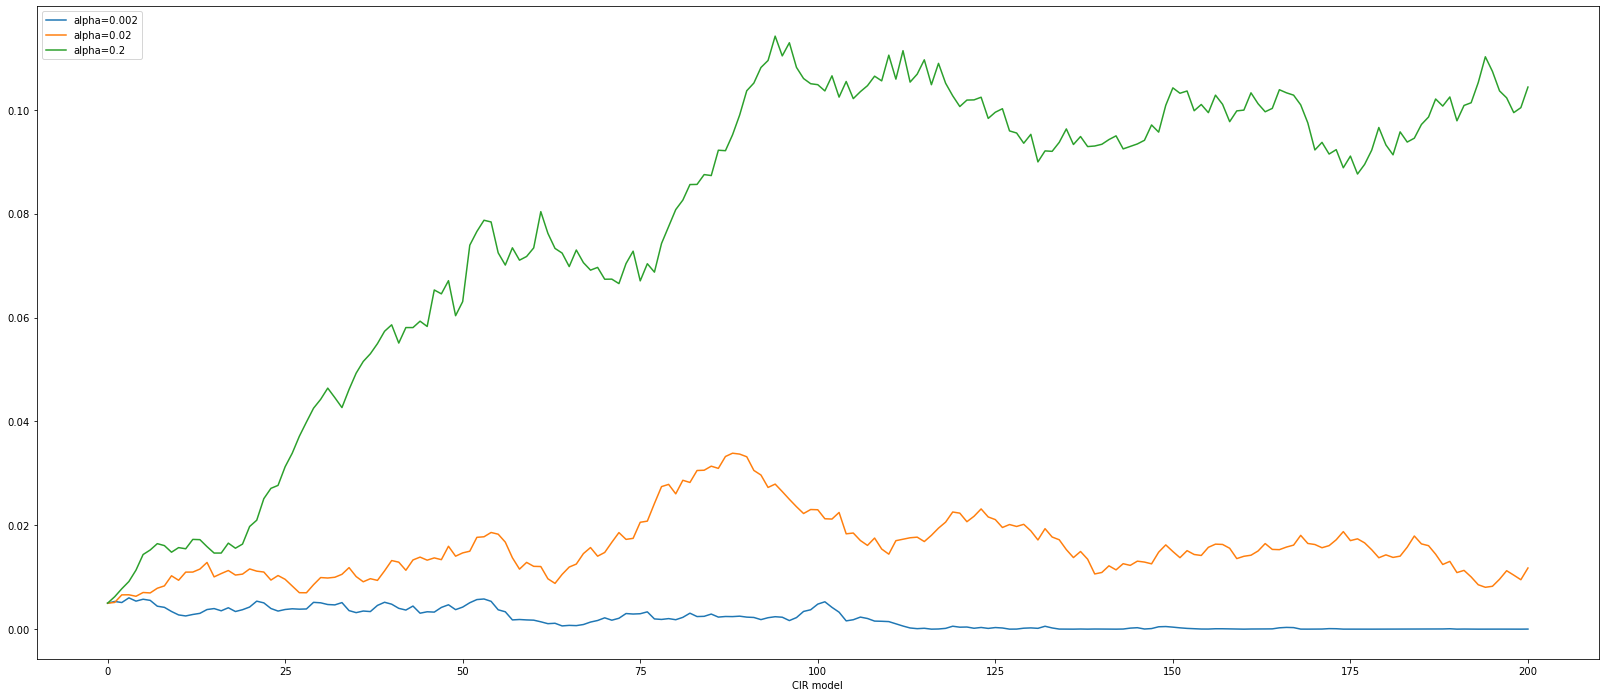

In [12]:
fig = plt.figure(figsize=(28,12))

for a in [0.002, 0.02, 0.2]:
    x, y = CIR_model(0.005, a, 0.15, 0.05, T=10, N=200)
    plt.plot(x,y, label='alpha=%s'%a)
    plt.legend(loc='upper left');

plt.legend(loc='upper left')
plt.xlabel('CIR model')